In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:

data=pd.read_csv("Mall_Customers.csv")
data




,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
cormatrix=data.corr().abs()
cormatrix



,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.026763,0.977548,0.013835
Age,0.026763,1.000000,0.012398,0.327227
Annual Income (k$),0.977548,0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,0.327227,0.009903,1.000000


In [4]:
uppertri=cormatrix.where(np.triu(np.ones(cormatrix.shape),k=1).astype(np.bool))
uppertri



C:\Users\user\AppData\Local\Temp\ipykernel_2548\1562843034.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  uppertri=cormatrix.where(np.triu(np.ones(cormatrix.shape),k=1).astype(np.bool))


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,NaN,0.026763,0.977548,0.013835
Age,NaN,NaN,0.012398,0.327227
Annual Income (k$),NaN,NaN,NaN,0.009903
Spending Score (1-100),NaN,NaN,NaN,NaN


In [5]:
 to_drop = [column for column in uppertri.columns if any(uppertri[column] <0.05)]
 to_drop



['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [8]:
malldf=pd.get_dummies(data,columns=['Gender'])
malldf




,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [9]:
from sklearn.cluster import DBSCAN


In [10]:
modeldbs= DBSCAN(eps=12.5,min_samples=4)
modeldbs
modeldbs.fit(malldf)



DBSCAN(eps=12.5, min_samples=4)

In [11]:
label=modeldbs.labels_
labels=pd.DataFrame(label,columns=['labels'])
labels




,labels
0,-1
1,0
2,-1
3,0
4,-1
...,...
195,-1
196,-1
197,-1
198,-1


In [12]:
finaldf=pd.concat([malldf,labels],axis=1)
finaldf




,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,labels
0,1,19,15,39,0,1,-1
1,2,21,15,81,0,1,0
2,3,20,16,6,1,0,-1
3,4,23,16,77,1,0,0
4,5,31,17,40,1,0,-1
...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,-1
196,197,45,126,28,1,0,-1
197,198,32,126,74,0,1,-1
198,199,32,137,18,0,1,-1


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

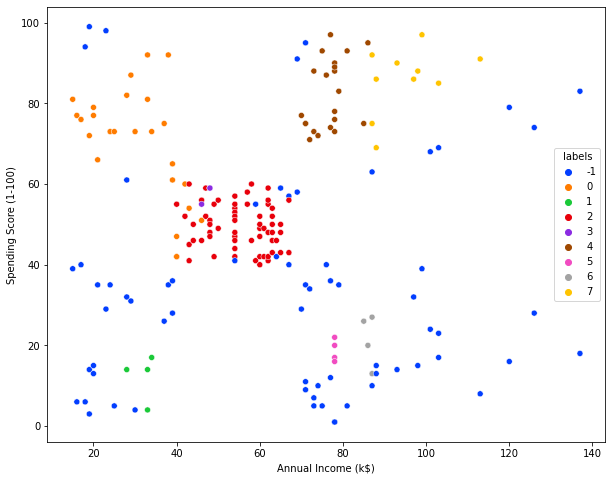

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=finaldf,hue="labels",palette='bright')
